# The Sparks Foundation GRIP Internship 

## To Explore Supervised Machine Learning - Task 1


> ### Name : Aditya Satdive |
> ### GRIP_DECEMBER'2020 |





# Problem Statement:

    In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.


In [1]:
# IMPORTING LIBRARIES

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the dataset
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#  checking for missing data
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

No missing values.

In [5]:
#dataset shape
df.shape

(25, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
# dataset description
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Plotting data points on 2-D graph to find any relationship between the data

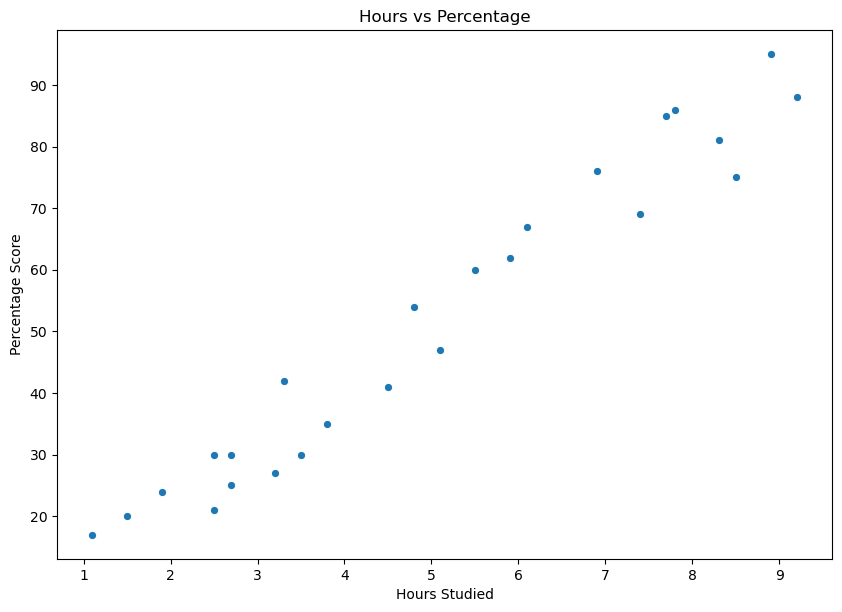

In [8]:
# plotting a scatterplot to represent the correlation
plt.figure(figsize=(10,7),dpi=100)
sns.scatterplot(x='Hours', y='Scores', data=df)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()


The above graph shows a clear positive linear correlation between Hours Studied and Percentage Scores¶


#### Hence, we see that there is a positive linear relation between the number of hours studied and percentage of score. 

In [9]:
# Finding correlation among the data infact this data set is very small

correlation= df.corr(method='pearson')
correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


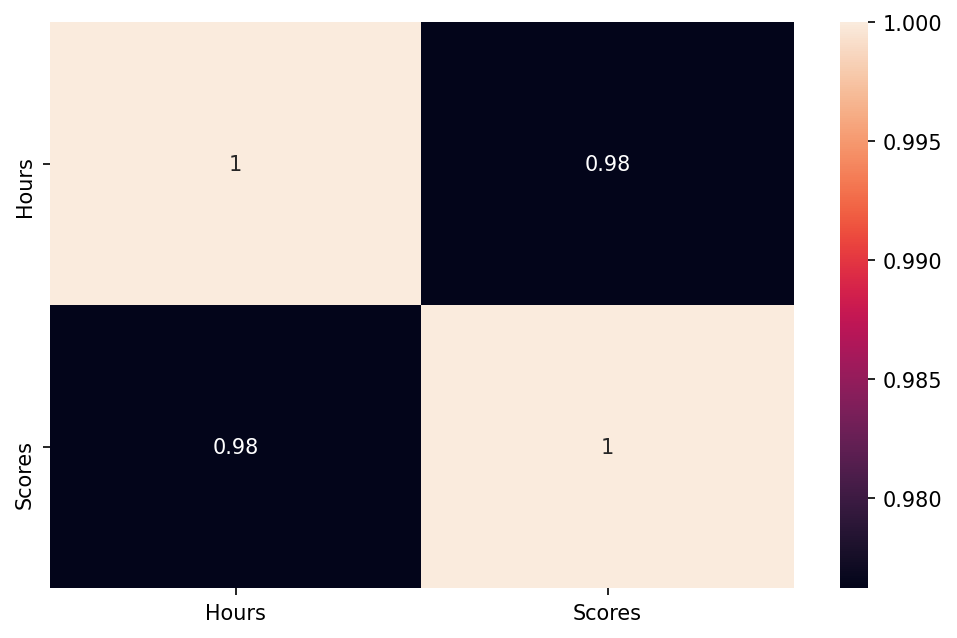

In [10]:
#correlation plot
plt.figure(figsize=(8,5),dpi=150)
correlation_matrix = df.corr()
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

# Preparing the data

### Dividing the data into "attributes" (inputs) and "labels" (outputs).


In [11]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

## Spliting this data into training and test sets

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=0)

In the train set we have 17 (80%) data while in the test set we have 8 (20%)data,
we will train the model on 17 data and predict on 8 data.


## Training the model¶


In [13]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

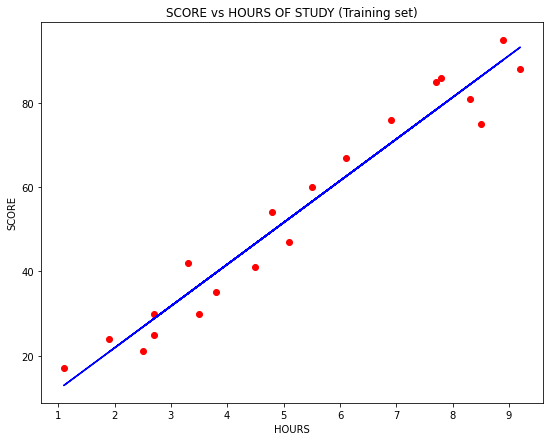

In [14]:
# VISUALIZING THE TRAINING SET RESULTS
plt.figure(figsize=(9,7))
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('SCORE vs HOURS OF STUDY (Training set)')
plt.xlabel('HOURS')
plt.ylabel('SCORE')
plt.show()

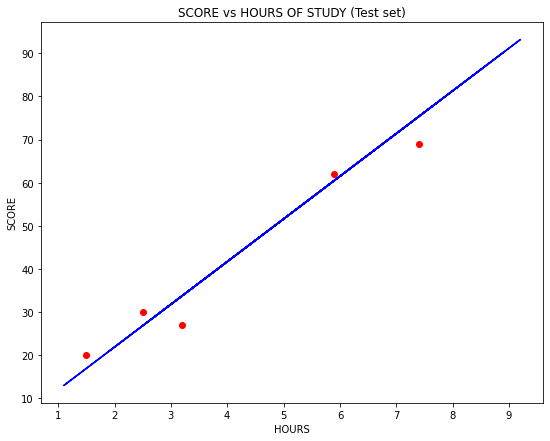

In [15]:
# VISUALIZING THE TEST SET RESULTS

plt.figure(figsize=(9,7))
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('SCORE vs HOURS OF STUDY (Test set)')
plt.xlabel('HOURS')
plt.ylabel('SCORE')
plt.show()


## Model Prediction¶


In [16]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [17]:
y_pred=regressor.predict(X_test) #Scores Prediction

### **Evaluating the model**


In [18]:
print(" Model R2 SCORE :",r2_score(y_test,y_pred))
print('\n')
print(" Model MSE SCORE :",mean_squared_error(y_test,y_pred))
print('\n')
print(" Model MAE SCORE:",mean_absolute_error(y_test, y_pred))
print('\n')
print(" Model RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))

 Model R2 SCORE : 0.9454906892105356


 Model MSE SCORE : 21.5987693072174


 Model MAE SCORE: 4.183859899002975


 Model RMSE:  4.6474476121003665


This model has an accuracy of 94% and the MSE value is minimal which indicates that the model performed Well.!! 

In [19]:
# Comparing Actual vs Predicted Scores
df_actual_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_actual_predicted

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


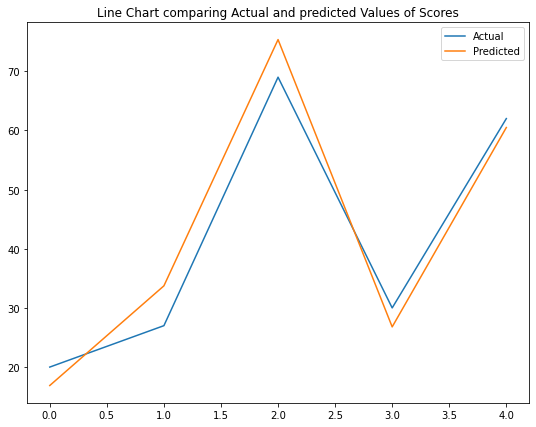

In [20]:
plt.figure(figsize=(9,7))
df_actual_predicted.Actual.plot()
df_actual_predicted.Predicted.plot()
plt.title('Line Chart comparing Actual and predicted Values of Scores')
plt.legend();

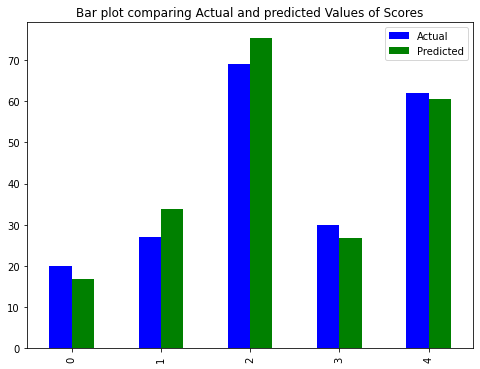

In [21]:
df_actual_predicted.plot(kind='bar',figsize=(8,6),color=['B','G'])
plt.title('Bar plot comparing Actual and predicted Values of Scores')
plt.show()

# **What will be The Predicted Score , if a Student study for 9.25 Hours in a Day?**

In [22]:
# Testing on our required data
score = regressor.predict([[9.25]])

print("A student that studies 9.25 hours in a dat score is : ",score)

A student that studies 9.25 hours in a dat score is :  [93.69173249]


# Conclusion

If a Student studies for 9.25 hrs in a day then his prediced score is 93.69 percentage.

                     # TASK COMPLETED !